# Lending Club Case Study
### by Ayush and Nivedita

## Imports

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [296]:
loan_df = pd.read_csv('loan.csv', low_memory=False)

In [297]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [298]:
loan_df.shape

(39717, 111)

- Observation: There are 39k+ rows and 100+ columns

In [299]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [300]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


Observation 
- There seem to be columns which have most values missing
- These can be dropped

---

## Feature Extraction
- We will choose the required columns for anlysis and drop the rest
- We will also drop columns with more than 90% missing values

### Null Value Analysis
- Choosing between imputing or dropping values based on threshold

In [301]:
# ?loan_df.dropna

#### Columns

##### Dropping columns where all values are missing

In [306]:
loan_df.dropna(how='all', axis=1, inplace=True)

In [307]:
loan_df.shape

(39717, 57)

In [308]:
df_checkpoint = loan_df.copy()

In [309]:
loan_df.shape

(39717, 57)

##### Dropping columns which only have one type of value
- they won't provide any relevants insights (they have only value throughout the column)

In [310]:
for col in loan_df.columns:
    if len(loan_df[col].unique()) == 1:
        print("dropping:", col, "which contained:", loan_df[col].unique(), 'as the only value')
        loan_df.drop(col, inplace=True, axis=1)

dropping: pymnt_plan which contained: ['n'] as the only value
dropping: initial_list_status which contained: ['f'] as the only value
dropping: policy_code which contained: [1] as the only value
dropping: application_type which contained: ['INDIVIDUAL'] as the only value
dropping: acc_now_delinq which contained: [0] as the only value
dropping: delinq_amnt which contained: [0] as the only value


In [311]:
loan_df.shape

(39717, 51)

In [312]:
col_checkpoint = loan_df.copy()

In [313]:
loan_df.shape

(39717, 51)

##### Checking percentage of missing values in all columns

In [209]:
miss_percentage = round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2)

In [315]:
# list of columns which have missing values
miss_percentage.loc[miss_percentage > 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
mths_since_last_delinq        64.66
mths_since_last_record        92.99
next_pymnt_d                  97.13
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

###### Observation: We can see that there are 2 columns with more than 90% missing values and one column with more than 60% missing values.

- First, we remove the columns with more than 90% missing values

In [316]:
loan_df.drop(list(miss_percentage[miss_percentage >= 90].index), axis=1, inplace=True)

- Next, we check what kind of values does mths_since_last_delinq has.

In [220]:
loan_df.mths_since_last_delinq.describe()

count    14035.000000
mean        35.900962
std         22.020060
min          0.000000
25%         18.000000
50%         34.000000
75%         52.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

In [317]:
loan_df.mths_since_last_delinq.value_counts()

0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
        ... 
115.0      1
106.0      1
95.0       1
120.0      1
89.0       1
Name: mths_since_last_delinq, Length: 95, dtype: int64

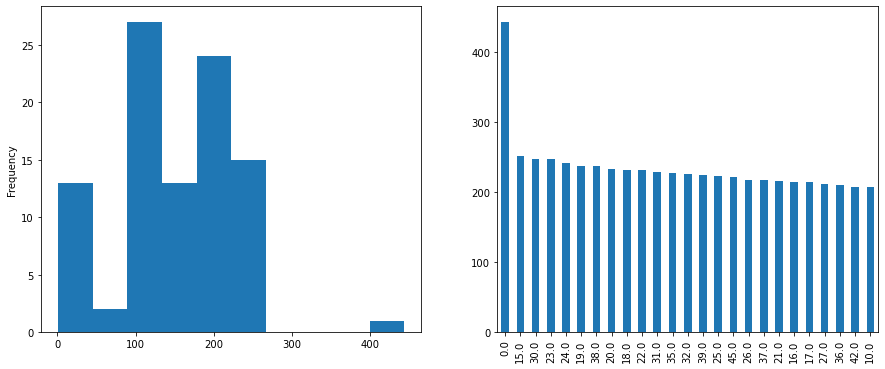

In [319]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

loan_df.mths_since_last_delinq.value_counts().plot(kind='hist', ax=ax1)
loan_df.mths_since_last_delinq.value_counts()[0:10].plot(kind='bar', ax=ax2)

plt.show()

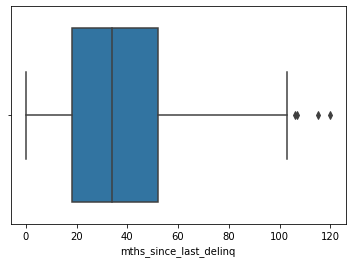

In [320]:
sns.boxplot(x='mths_since_last_delinq', data=loan_df)
plt.show()

#### Note:

This column lets us know the number of months since the borrower's last delinquency.  
Since this is an important metric for loan application, we will be keeping this value.  
However, we are not be imputing the values in this phase. We will do so later if required

In [322]:
loan_df.shape

(39717, 49)

###### Observation: about 55% of the columns had no relevant information, and have beend dropped

### Feature Extraction
- We will analyze the columns and description and decide whether they are relevant for our analysis or not

In [326]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

##### Dropping customer behavior columns which are not present at the time of loan application

In [327]:
all_cust_behav_col = ['collection_recovery_fee','delinq_2yrs','earliest_cr_line','inq_last_6mths','last_credit_pull_d','last_pymnt_amnt','last_pymnt_d','open_acc','out_prncp','out_prncp_inv','pub_rec','recoveries','revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp']
loan_df.drop(all_cust_behav_col, axis=1, inplace=True)

##### After analyzing the column description we have decided to drop some columns

| Column          | Reason                                |
|-----------------|---------------------------------------|
| member_id       | similar to id                         |
| funded_amnt     | Data Unavailable when loan is applied |
| funded_amnt_inv | Data Unavailable when loan is applied |
| url             | not required for analysis             |
| desc            | not important for reducing risk       |
| title           | similar to purpose                    |


In [329]:
loan_df.drop(['member_id', 'funded_amnt', 'funded_amnt_inv', 'url', 'desc', 'title'], axis=1, inplace=True)

In [330]:
loan_df.shape

(39717, 23)

In [331]:
loan_df.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'mths_since_last_delinq',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

##### Looking closely at the data, some of the columns are filled with one value or NaN, so we will drop these as well

In [332]:
loan_df.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [333]:
loan_df.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [334]:
loan_df.tax_liens.unique()

array([ 0., nan])

In [335]:
loan_df.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'], axis=1, inplace=True)

In [336]:
loan_df.shape

(39717, 20)

###### Observation: ~18% columns remain after feature selection

##### As a final step we check for correlation between the numeric columns

In [338]:
loan_df.corr()

,id,loan_amnt,installment,annual_inc,dti,mths_since_last_delinq,pub_rec_bankruptcies
id,1.000000,0.141919,0.086587,0.008731,0.095983,0.117193,-0.009505
loan_amnt,0.141919,1.000000,0.930288,0.271149,0.066439,0.014871,-0.037180
installment,0.086587,0.930288,1.000000,0.270874,0.054186,0.000047,-0.034103
annual_inc,0.008731,0.271149,0.270874,1.000000,-0.122732,-0.008822,-0.016801
dti,0.095983,0.066439,0.054186,-0.122732,1.000000,0.068815,0.005691
mths_since_last_delinq,0.117193,0.014871,0.000047,-0.008822,0.068815,1.000000,0.025841
pub_rec_bankruptcies,-0.009505,-0.037180,-0.034103,-0.016801,0.005691,0.025841,1.000000


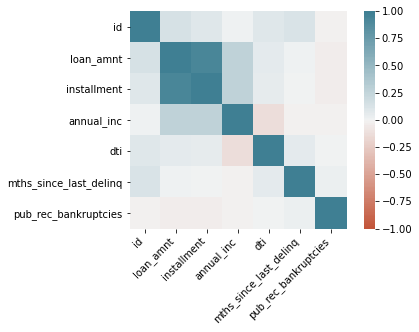

In [339]:
ax = sns.heatmap(
    loan_df.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### Observation: 
- Installament and Loan Amount are positively correlated (strong)
- dti and annual income are negatively correlated (weak)

----

#### Rows

In [341]:
loan_df.dropna(how='all', axis=0).shape

(39717, 20)

##### Observation: There are no rows where all values are missing

In [342]:
loan_df.dropna().shape

(12534, 20)

In [347]:
len(loan_df[loan_df.isnull().sum(axis=1) <= 3])

39717

##### Observation: There are no rows with more than 3 missing values, hence no rows need to be dropped

---

### Imputing Missing Values

In [349]:
miss_percentage = round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2)

##### The following columns have missing values which can be imputed

In [358]:
miss_percentage.loc[miss_percentage > 0].index.to_list()

['emp_title', 'emp_length', 'mths_since_last_delinq', 'pub_rec_bankruptcies']

In [360]:
miss_percentage.loc[miss_percentage > 0]

emp_title                  6.19
emp_length                 2.71
mths_since_last_delinq    64.66
pub_rec_bankruptcies       1.75
dtype: float64

In [362]:
loan_df.emp_title.value_counts()

US Army                             134
Bank of America                     109
IBM                                  66
AT&T                                 59
Kaiser Permanente                    56
                                   ... 
FResnius Medical CAre                 1
Momenta Pharmaceuticals               1
Northern Leasing Systems Inc.         1
mohawk tile & marble of delaware      1
Berkshire Healthcare Systems          1
Name: emp_title, Length: 28820, dtype: int64

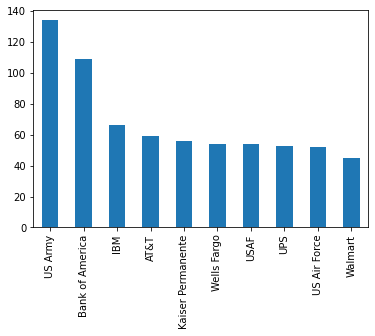

In [367]:
loan_df.emp_title.value_counts()[0:10].plot(kind='bar')
plt.show()

In [371]:
loan_df.emp_title.mode()

0    US Army
dtype: object

##### Note: Dropping emp_title
6% of the data (~1800 entries) is missing in emp_title, however, the most frequenty occuring emp_title (US Army) is ~0.44% (134 entries), hence filling this column with mode will skew the data.   
Moreover, many of the emp_titles are in small numbers, so it may not be fruitful to analyze this column.

In [ ]:
loan_df.drop(['emp_title'], axis=1, inplace=True)

In [376]:
loan_df.shape

(39717, 19)

In [380]:
loan_df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

##### Normalizing Employee Length

In [384]:
loan_df.emp_length = loan_df.emp_length.apply(lambda x: str(x).replace('years', '').replace('year', '').replace('< 1', '0').replace('10+', '10'))

In [404]:
len(loan_df[loan_df.emp_length == 'nan'])

1075

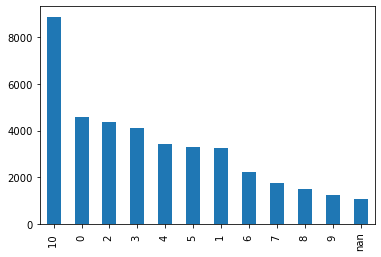

In [411]:
loan_df.emp_length.value_counts().plot(kind='bar')
plt.show()

In [413]:
loan_df.emp_length = loan_df.emp_length.apply(lambda x: str(x).replace('nan', '10'))

In [419]:
loan_df.emp_length.value_counts()

10     8879
0      4583
2      4388
3      4095
4      3436
5      3282
1      3240
6      2229
7      1773
8      1479
9      1258
10     1075
Name: emp_length, dtype: int64

In [422]:
loan_df.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [425]:
loan_df.pub_rec_bankruptcies.isnull().sum()

697

In [434]:
loan_df.pub_rec_bankruptcies.fillna(0, inplace=True)

In [436]:
loan_df.pub_rec_bankruptcies.isnull().sum()

0

In [438]:
loan_df.pub_rec_bankruptcies.value_counts()

0.0    38036
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

---

In [441]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39717 non-null  int64  
 1   loan_amnt               39717 non-null  int64  
 2   term                    39717 non-null  object 
 3   int_rate                39717 non-null  object 
 4   installment             39717 non-null  float64
 5   grade                   39717 non-null  object 
 6   sub_grade               39717 non-null  object 
 7   emp_length              39717 non-null  object 
 8   home_ownership          39717 non-null  object 
 9   annual_inc              39717 non-null  float64
 10  verification_status     39717 non-null  object 
 11  issue_d                 39717 non-null  object 
 12  loan_status             39717 non-null  object 
 13  purpose                 39717 non-null  object 
 14  zip_code                39717 non-null